In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

**Git Repository Link**
> https://github.com/fleursmith/dsci_summative2.git

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallaahmed77/healthcare-risk-factors-dataset")

print("Path to dataset files:", path)

/Users/fleursmith/Documents/DataScience/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/fleursmith/.cache/kagglehub/datasets/abdallaahmed77/healthcare-risk-factors-dataset/versions/1


In [ ]:
# Load dataset
df = pd.read_csv(f"{path}/dirty_v3_path.csv")

# Display first few rows
df.head()

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426


## 1) Summarising the dataset

In [ ]:
# Summarise the dataset
df.info()
df.describe()

# .info() - summary of structure, data types, missing values
# .describe() - summary of numerical values and statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                25500 non-null  float64
 1   Gender             25500 non-null  object 
 2   Medical Condition  25500 non-null  object 
 3   Glucose            25500 non-null  float64
 4   Blood Pressure     25500 non-null  float64
 5   BMI                30000 non-null  float64
 6   Oxygen Saturation  30000 non-null  float64
 7   LengthOfStay       30000 non-null  int64  
 8   Cholesterol        30000 non-null  float64
 9   Triglycerides      30000 non-null  float64
 10  HbA1c              30000 non-null  float64
 11  Smoking            30000 non-null  int64  
 12  Alcohol            30000 non-null  int64  
 13  Physical Activity  30000 non-null  float64
 14  Diet Score         30000 non-null  float64
 15  Family History     30000 non-null  int64  
 16  Stress Level       300

,Age,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,noise_col
count,25500.000000,25500.000000,25500.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,54.616784,123.622179,140.455337,28.476155,94.954992,4.414133,213.033891,176.837375,6.294377,0.279767,0.238533,3.803214,4.029654,0.439433,5.917312,6.229836,-0.517010
std,15.973618,41.576943,21.077933,5.728804,3.736202,2.761536,33.519757,48.812827,1.320269,0.448892,0.426194,2.011729,1.817165,0.496326,2.225057,1.187669,100.076959
min,10.000000,20.320000,74.240000,7.670000,67.510000,1.000000,95.730000,-22.480000,3.280000,0.000000,0.000000,-3.680000,-1.750000,0.000000,-2.440000,1.590000,-412.169596
25%,45.000000,96.280000,125.140000,24.590000,93.000000,3.000000,189.500000,141.280000,5.330000,0.000000,0.000000,2.350000,2.770000,0.000000,4.370000,5.410000,-68.270749
50%,55.000000,110.500000,138.320000,28.050000,95.300000,4.000000,211.835000,173.365000,5.970000,0.000000,0.000000,3.590000,3.790000,0.000000,5.900000,6.230000,-0.510742
75%,66.000000,136.610000,153.790000,31.810000,97.380000,5.000000,235.310000,208.630000,6.920000,1.000000,0.000000,5.060000,5.020000,1.000000,7.440000,7.050000,66.811399
max,89.000000,318.510000,226.380000,56.850000,110.070000,19.000000,358.370000,421.510000,12.360000,1.000000,1.000000,12.410000,12.060000,1.000000,15.450000,10.350000,467.894910


**.info() summary**
* total rows: 30,000
* total columns: 20
* columns with missing values:
    * age, gender, medical condition, glucose, blood pressure each have 25,500 non-null entries, meaning 4,500 missing in each of these 5 columns
* columns with full data (no missing values):
    * 15 columns have all 30,000 non-null entries, including BMI, oxygen saturation, length of stay, cholesterol, triglycerides, HbA1c, smoking, alcohol, physical activity, diet score, family history, stress level, sleep hours, random_notes, noise_col
* Data types breakdown:
    * 13 float columns
    * 4 integer columns
    * 3 object columns

**.describe summary**
* sample sizes: most health variables have 30,000 observations, but age, glucose, and blood pressure each have 25,500
* typical patient profile (means):
    * age: ~54.6 years
    * glucose: ~123.6 mg/dL
    * blood pressure: ~140.5 mmHg
    * BMI: ~28.5 (overweight range)
    * oxygen saturation: ~95%
    * length of stay: ~4.4 days
    * cholesterol: ~213 mg/dL
    * triglycerides: ~177 mg/dL
    * HbA1c: ~6.29%
* lifestyle means:
    * smoking: 0.28
    * alcohol: 0.24 (≈24% drinkers if binary)
    * physical activity: ~3.8 hours/units
    * diet score: ~4.0
    * family history: 0.44 (≈44% with family history if binary)
    * sleep hours: ~6.23
* notable ranges:
    * age: 10 to 89
    * glucose: 20 to 319
    * blood pressure: 74 to 226
    * BMI: 7.7 to 56.9
    * oxygen saturation: 67.5 to 110.1
    * length of stay: 1 to 19 days
    * HbA1c: 3.28 to 12.36


## 2) Cleaning and renaming columns

In [ ]:
# Set unnecessary column to be removed
unnecessary_cols = [ "random_notes" , "noise_col" ]

# Remove columns that are not necessary
df.drop(columns=unnecessary_cols, inplace=True)

In [ ]:
# Print all columns names
df.columns

Index(['Age', 'Gender', 'Medical Condition', 'Glucose', 'Blood Pressure',
       'BMI', 'Oxygen Saturation', 'LengthOfStay', 'Cholesterol',
       'Triglycerides', 'HbA1c', 'Smoking', 'Alcohol', 'Physical Activity',
       'Diet Score', 'Family History', 'Stress Level', 'Sleep Hours'],
      dtype='object')

**Renaming Columns**

To make the dataset easier to work with in Python and ensure consistent, clear, and code-friendly naming, each column has been converted to lowercase and formatted using snake_case (the standard naming convention in data science)

| Original Column Name     | Renamed Column Name     |
|--------------------------|--------------------------|
| Age                      | age                      |
| Gender                   | gender                   |
| Medical Condition        | medical_condition        |
| Glucose                  | glucose                  |
| Blood Pressure           | blood_pressure           |
| BMI                      | bmi                      |
| Oxygen Saturation        | oxygen_saturation        |
| LengthOfStay             | length_of_stay           |
| Cholesterol              | cholesterol              |
| Triglycerides            | triglycerides            |
| HbA1c                    | hba1c                    |
| Smoking                  | smoking_status           |
| Alcohol                  | alcohol_use              |
| Physical Activity        | physical_activity        |
| Diet Score               | diet_score               |
| Family History           | family_history           |
| Stress Level             | stress_level             |
| Sleep Hours              | sleep_hours              |

In [ ]:
# Rename columns
df.rename(columns={

    "Age": "age",
    "Gender": "gender",
    "Medical Condition": "medical_condition",
    "Glucose": "glucose",
    "Blood Pressure": "blood_pressure",
    "BMI": "bmi",
    "Oxygen Saturation": "oxygen_saturation",
    "LengthOfStay": "length_of_stay",
    "Cholesterol": "cholesterol",
    "Triglycerides": "triglycerides",
    "HbA1c": "hba1c",
    "Smoking": "smoking_status",
    "Alcohol": "alcohol_use",
    "Physical Activity": "physical_activity",
    "Diet Score": "diet_score",
    "Family History": "family_history",
    "Stress Level": "stress_level",
    "Sleep Hours": "sleep_hours"

}, inplace=True)

# Print updated columns to check renaming has been done correctly (no typos)
print(df.columns)

Index(['age', 'gender', 'medical_condition', 'glucose', 'blood_pressure',
       'bmi', 'oxygen_saturation', 'length_of_stay', 'cholesterol',
       'triglycerides', 'hba1c', 'smoking_status', 'alcohol_use',
       'physical_activity', 'diet_score', 'family_history', 'stress_level',
       'sleep_hours'],
      dtype='object')


## 3) Summary of variables

| Variable Name          | Summary                                                                                    | Units                      |
|------------------------|--------------------------------------------------------------------------------------------|----------------------------|
| Age                    | The patient's age in years                                                                 | years                      |
| Gender                 | The patient's self-reported gender                                                         | none (categorical)         |
| Medical Condition      | The primary diagnosed medical condition for the patient                                    | none (categorical)         |
| Glucose                | The patient’s random (non-fasting) blood glucose level                                     | mg/dL                      |
| Blood Pressure         | The patient’s systolic blood pressure measurement                                          | mmHg                       |
| BMI                    | Body Mass Index, a calculated measure of weight relative to height                         | none                       |
| Oxygen Saturation      | The percentage of haemoglobin in the blood that is carrying oxygen (SpO₂)                  | %                          |
| Length of Stay         | Number of days the patient stayed in hospital                                              | days                       |
| Cholesterol            | Total cholesterol level in the bloodstream                                                 | mg/dL                      |
| Triglycerides          | The amount of triglycerides (fat) in the blood, recorded as a non-fasting measurement      | mg/dL                      |
| HbA1c                  | Percentage of glycated haemoglobin reflecting average blood sugar over 2–3 months          | %                          |
| Smoking Status         | Indicates whether the patient is a current smoker (binary yes/no)                          | 0 = non-smoker, 1 = smoker |
| Alcohol Use            | Indicates whether the patient consumes alcohol (binary yes/no)                             | 0 = no, 1 = yes            |
| Physical Activity      | A numerical score representing the patient’s level of physical activity                    | approx. hours/week         |
| Diet Score             | An index estimating the quality or healthiness of the patient’s diet                       | numeric score              |
| Family History         | Indicates whether the patient has a family history of chronic illness (binary yes/no)      | 0 = no, 1 = yes            |
| Stress Level           | A numerical score reflecting the patient’s self-reported stress                            | numeric scale              |
| Sleep Hours            | The average number of hours the patient sleeps per night                                   | hours/night                |

## 4) Medical information summary

**Explanations of the Medical Variables**

**Glucose**
* A measure of the concentration of glucose (sugar) circulating in the blood which is used to assess metabolic health and diabetes risk
* The glucose column records random (non-fasting) plasma glucose levels:
    * We can infer this because the mean (~123.6 mg/dL) is too high and the range (20–318 mg/dL) is too wide for fasting glucose values
    * Random plasma glucose is a measurement of the amount of glucose in the bloodstream, taken at any time of day (not specifically after fasting)
    * As food intake impacts plasma glucose levels, a random glucose test is far more variable than a fasting glucose test
* Healthy range for this variable: 4 - 8 mmol/L for a non-diabetic random glucose
* Units: 
    * mg/dL - milligrams of glucose per decilitre of blood
    * mmol/L - millimoles of glucose per litre of blood

**Blood Pressure**
* A measure of the force exerted by blood against artery walls
* The blood pressure column records systolic blood pressure (not the diastolic value):
    * The values in the dataset (~74–226 mmHg, mean ~140 mmHg) align with systolic rather than diastolic readings
    * Systolic pressure: the pressure when your heart pushes blood out around your body
    * Diastolic pressure: the pressure when your heart rests between beats and blood is pushed around your heart
* Healthy range for this variable: 90 - 120 mmHg (systolic)
* Units: mmHg - millimetres of mercury (the standard unit for blood pressure)

**BMI**
* Body Mass Index (BMI) is an indicator of body fatness calculated from weight and height
    * Formula for BMI calculation: weight / height²
    * this is used to classify underweight, healthy, overweight, obese
* The BMI column records pre-calculated BMI scores:
    * The dataset does not include height or weight columns, so BMI must be provided as an already-computed value
* Healthy range for this variable: 18.5 - 24.9

**Oxygen Saturation**
* The percentage of haemoglobin in the blood that is bound to oxygen, reflecting how well oxygen is being carried through the bloodstream
* The oxygen saturation column records SpO₂ values from pulse oximetry:
    * The values (~67–110%) match the expected behaviour of pulse oximeters, including occasional physiologically impossible readings (>100%)
* Healthy range for this variable: 95–100%
* Units: percentage (%) - proportion of haemoglobin that is oxygen-saturated

**Cholesterol**
* A measure of the total cholesterol circulating in the bloodstream
* The cholesterol column records total cholesterol measured in mg/dL:
    * The mean (~213 mg/dL) and distribution match typical total cholesterol values reported in mg/dL
* Healthy range for this variable: < 5 mmol/L 
* Units: 
    * mg/dL - milligrams of cholesterol per decilitre of blood
    * mmol/L - millimoles of cholesterol per litre of blood

**Triglycerides**
* A type of fat found in the blood
* The triglycerides column records random (non-fasting) plasma triglyceride concentration:
    * The mean (~177 mg/dL) and range are consistent with mg/dL reporting
    * We can infer this because the mean (~177 mg/dL) and the range upper range (>400 mg/dL) are too high for fasting triglyceride values
    * Random plasma triglyceride is a measurement of the amount of triglyceride in the bloodstream, taken at any time of day (not specifically after fasting)
    * As food intake impacts plasma triglyceride levels, a random triglyceride test is far more variable than a fasting triglyceride test
* Healthy range for this variable: < 2.3 mmol/L
* Units: 
    * mg/dL - milligrams of triglycerides per decilitre of blood
    * mmol/L - millimoles of triglycerides per litre of blood

**HbA1c**
* A measure of "glycated haemoglobin" which reflects average blood glucose levels over the past 2–3 months
    * The test measures the amount of hemoglobin (the protein in your red blood cells that carries oxygen)in red blood cells that has glucose attached to it
    * Since red blood cells have a lifespan of about 2 to 3 months, the HbA1c level reflects your average blood glucose during that time
* The HbA1c column records HbA1c values in percent (%):
    * This represents the percentage of total hemoglobin protein in the red blood cells that has glucose (sugar) attached to it
    * HbA1C measurement has now been updated to use the unit mmol/mol in the UK
        * However, conversion between using percentage and mmol/mol as units for HbA1c is non-linear, therefors the healthy range here is stated in the older units style, instead of the current NHS published healthy range
* Healthy range for this variable: < 6.0%
* Units: percent (%) - percentage of haemoglobin molecules that have glucose attached

In [ ]:
# Print all unique values in the medical condition column
df["medical_condition"].value_counts()

medical_condition
Hypertension    7120
Diabetes        6417
Obesity         3857
Healthy         3039
Asthma          2037
Arthritis       1796
Cancer          1234
Name: count, dtype: int64

**Medical Conditions**
* Hypertension: chronically elevated blood pressure, increasing risk of heart disease and stroke
* Diabetes: a condition where the body cannot regulate blood glucose properly
* Obesity: excess body fat that increases risk of metabolic and cardiovascular diseases
* Healthy: no significant chronic medical conditions recorded
* Asthma: chronic airway inflammation causing wheezing, breathlessness, and flare-ups
* Arthritis: joint inflammation leading to pain, stiffness, and reduced mobility
* Cancer: uncontrolled cell growth forming malignant tumours or spreading in the body

## 5) Convert medical data to standard UK units

**Columns with Units that Need Converting**
| Column Name   | Original Units | Standard UK Units |
|---------------|----------------|-------------------|
| Glucose       | mg/dL          | mmol/L            |
| Cholesterol   | mg/dL          | mmol/L            |
| Triglycerides | mg/dL          | mmol/L            |
| HbA1c         | %              | mmol/mol          |

**How to Convert from mg/dL to mmol/L**
1) Convert mg to g:
    * g = mg / 1000
2) Convert per dL to per L:
    * /L = /dL x 10
3) Convert grams to moles:
    * mol = g / [molecular weight]
4) Convert mol to mmol:
    * mmol = mol x 1000

>**Final Equation for mg/dL to mmol/L**
>* mmol/L = (mg/dL x 10) / [molecular weight]


**How to Convert from HbA1c % to mmol/mol**
* HbA1c conversion is not a physical unit conversion - it is a regression equation, so the “steps” are algebraic rather than dimensional
1) Start with HbA1c as a percentage:
    * x = HbA1c %
2) Multiply the percentage by the slope:
    * y = 10.929x
3) Add the y-intercept
    * mmol/mol = 10.929x - 23.5

>**Final Equation for HbA1c % to mmol/mol**
>* mmol/mol = 10.929 x HbA1c % - 23.5

| Column Name   | Original Units | Standard UK Units | Conversion Equation                                       | Molecular Weight |
|---------------|----------------|-------------------|-----------------------------------------------------------|------------------|
| Glucose       | mg/dL          | mmol/L            | `mmol/L = (mg/dL × 10) / [molecular weight]`              | 180.156          |
| Cholesterol   | mg/dL          | mmol/L            | `mmol/L = (mg/dL × 10) / [molecular weight]`              | 386.65           |
| Triglycerides | mg/dL          | mmol/L            | `mmol/L = (mg/dL × 10) / [molecular weight]`              | 885.7            |
| HbA1c         | %              | mmol/mol          | `mmol/mol = 10.929 × (HbA1c %) − 23.5`                    | N/A              |

In [ ]:
# Glucose conversion
# Molecular weight for glucose
MW_glucose = 180.156

# Convert glucose from mg/dL to mmol/L
df['glucose'] = (df['glucose'] * 10) / MW_glucose

# Display first few rows to check conversion
df['glucose'].head()

0    7.606741
1    3.973223
2    5.286529
3         NaN
4    5.281534
Name: glucose, dtype: float64

In [ ]:
# Cholesterol conversion
# Molecular weight for cholesterol
MW_cholesterol = 386.65

# Convert cholesterol from mg/dL to mmol/L
df['cholesterol'] = (df['cholesterol'] * 10) / MW_cholesterol

# Display first few rows to check conversion
df['cholesterol'].head()

0    5.997155
1    4.282167
2    5.559033
3    5.113410
4    6.712272
Name: cholesterol, dtype: float64

In [ ]:
# Triglycerides conversion
# Molecular weight for triglycerides
MW_triglycerides = 885.7

# Convert triglycerides from mg/dL to mmol/L
df['triglycerides'] = (df['triglycerides'] * 10) / MW_triglycerides

# Display first few rows to check conversion
df['triglycerides'].head()

0    2.377329
1    1.461104
2    1.866885
3    2.056340
4    1.308005
Name: triglycerides, dtype: float64

In [ ]:
# HbA1c conversion
# Convert HbA1c from % to mmol/mol
df['hba1c'] = (df['hba1c'] * 10.929) - 23.5

# Display first few rows to check conversion
df['hba1c'].head()

0    59.66969
1    30.16139
2    37.70240
3    52.12868
4    41.85542
Name: hba1c, dtype: float64

## 6) Handling missing data

In [ ]:
df.isna().sum()

age                  4500
gender               4500
medical_condition    4500
glucose              4500
blood_pressure       4500
bmi                     0
oxygen_saturation       0
length_of_stay          0
cholesterol             0
triglycerides           0
hba1c                   0
smoking_status          0
alcohol_use             0
physical_activity       0
diet_score              0
family_history          0
stress_level            0
sleep_hours             0
dtype: int64

**Columns with Missing Values**
* Age - continuous, numerical data
* Gender - categorical data
* Medical Condition - categorical data
* Glucose - continuous, numerical data
* Blood Pressure - continuous, numerical data

**Handling Missing Categorical Values**

Using an "Unknown" category is a sensible choice for handling missing values in the gender and medical condition columns because these variables represent discrete groups that cannot be accurately estimated using numerical modelling techniques. Imputing the most frequent category would risk distorting the true distribution, especially given the high proportion of missing values, whereas assigning an "Unknown" label preserves the information that these entries were genuinely unrecorded. This approach maintains the integrity of the dataset, avoids introducing artificial bias, and allows the categorical variables to remain usable in later analysis without making unsupported assumptions.

In [ ]:
# Handle missing values in the gender column by assigning them to an Unknown category
df['gender'] = df['gender'].fillna('Unknown')

# Check that there are no more missing values in gender
df['gender'].isnull().sum()

np.int64(0)

In [ ]:
# Handle missing values in the medical_condition column by assigning them to an Unknown category
df['medical_condition'] = df['medical_condition'].fillna('Unknown')

# Check that there are no more missing values in medical condition
df['medical_condition'].isnull().sum()

np.int64(0)

**Handling Missing Continuous, Numerical Values**

Regression imputation is a sensible choice for handling missing values in the age, glucose, and blood pressure columns because these variables are likely correlated with several other clinical and lifestyle measures in the dataset. Instead of filling missing values with simple averages, which ignore real relationships between variables, regression imputation uses the patterns present in the complete data to generate more realistic, individualised estimates. This helps create a more accurate and less biased dataset for later analysis.

>**Webpage Explaining Regression Imputation**
>* https://www.kaggle.com/code/shashankasubrahmanya/missing-data-imputation-using-regression

**Regression Imputation for Continuous Numerical Columns: Step-by-Step Plan**
1) Identify Missing Values: split the dataset into rows where each continuous variable (Age, Glucose, Blood Pressure) is present and rows where it is missing
2) Select Predictors: choose relevant variables that are continuous, numerical, and contain no missing values (e.g., BMI, Cholesterol, HbA1c, Sleep Hours, Diet Score). These form the predictor set for all three imputation models
3) Prepare Training Data: for each target variable (Age, Glucose, Blood Pressure), define the regression model using rows where that variable is not missing. Predictors = X, target = y
4) Fit Regression Models: train a separate linear regression model for each variable with missing values using the complete-case rows for that variable
5) Predict Missing Values: apply each fitted regression model to rows where its target variable is missing to generate predicted values
6) Impute Values: replace missing entries in Age, Glucose, and Blood Pressure with their respective model predictions
7) Recombine Dataset: merge the imputed rows back into the full dataset so that all three continuous numerical columns are complete
8) Validate: compare the distributions of observed vs. imputed values for each column to ensure predictions are plausible and consistent with real patterns in the data

> To get this step-by-step plan for regression imputation, after reading through the webpage linked above, we then submitted it to ChatGPT (alongside our dataset) and asked it to summarise the steps that they had taken to perform a regression imputation, linking it to how we could do this for our own dataset. We did this to ensure that our understanding of this webpage was accurate before we used the information from it

In [ ]:
# Import linear regression model for imputation
from sklearn.linear_model import LinearRegression

# I am selecting all continuous numeric variables with no missing values to help predict age, glucose and blood_pressure
# This helps the regression model use as much complete numeric information as possible
# It avoids predictors that also contain missing values

predictor_cols = [
    'bmi',
    'oxygen_saturation',
    'length_of_stay',
    'cholesterol',
    'triglycerides',
    'hba1c',
    'physical_activity',
    'diet_score',
    'family_history',
    'stress_level',
    'sleep_hours'
]

# Check that these columns have no missing values
df[predictor_cols].isnull().sum()

bmi                  0
oxygen_saturation    0
length_of_stay       0
cholesterol          0
triglycerides        0
hba1c                0
physical_activity    0
diet_score           0
family_history       0
stress_level         0
sleep_hours          0
dtype: int64

In [ ]:
# Impute missing values in target using linear regression on predictors

# Define the function
def regression_impute(df, target, predictors, add_flag=True):
        # This makes a reusable function for regression imputation
        # df: dataframe containing the data
        # target: the column to be imputed
        # predictors: list of columns to use as predictors
        # add_flag: whether to add a flag column indicating imputed rows

    # Define rows with and without missing target values
    not_null = df[df[target].notnull()]
    null = df[df[target].isnull()]
        # non_null: rows where target is not missing
        # null: rows where target is missing

     # If no missing values, create a 0-only flag and stop the function as no imputation is needed
    if null.empty:
        if add_flag and f"{target}_imputed" not in df.columns:
            df[f"{target}_imputed"] = 0
        return None
    
    # Set up training data
    X_train = not_null[predictors]
    y_train = not_null[target]
        # X_train = predictor columns (BMI, cholesterol, sleep_hours, etc.)
        # y_train = the real observed values of the target column (age, glucose, or blood_pressure)

    # Select rows requiring imputation
    X_test = null[predictors]

    # Fit regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
        # Creates a linear regression object and fits it to the complete cases

     # Predict missing values
    preds = model.predict(X_test)
        # This generates predicted values for rows where the target variable was missing

    # Fill in missing values in the original dataframe
    df.loc[df[target].isnull(), target] = preds
        # This assigns the predicted values back into the original dataframe

     # Add imputation flag
    if add_flag:
        flag_name = f"{target}_imputed"
        df[flag_name] = 0
        df.loc[null.index, flag_name] = 1
            # This creates a new column indicating which rows were imputed
            # It does this by creating a new column, setting all rows to 0 initially, then setting rows that were imputed to 1
            # This flag allows us to later check the distributions of imputed vs observed values

        return model

In [ ]:
# create a dictionary to store models if we want to inspect them later
imputation_models = {}

# Start a loop running 3 times, once for each of the three variables that need imputation
for target in ['age', 'glucose', 'blood_pressure']:
    # Run the regression imputation function for each variable
    model = regression_impute(df, target, predictor_cols, add_flag=True)
        # df: dataset
        # target: the variable currently being imputed
        # predictor_cols: the list of complete predictor variables
        # add_flag=True: tells the function to create the *_imputed columns
    # Save the fitted model into the dictionary
    imputation_models[target] = model


# Check remaining missing values
df[['age','glucose','blood_pressure']].isnull().sum()

age               0
glucose           0
blood_pressure    0
dtype: int64

**Check Dataset for Any Remaining Missing Values**

In [ ]:
# Check if any columns still contain missing values
df.isnull().sum()

age                       0
gender                    0
medical_condition         0
glucose                   0
blood_pressure            0
bmi                       0
oxygen_saturation         0
length_of_stay            0
cholesterol               0
triglycerides             0
hba1c                     0
smoking_status            0
alcohol_use               0
physical_activity         0
diet_score                0
family_history            0
stress_level              0
sleep_hours               0
age_imputed               0
glucose_imputed           0
blood_pressure_imputed    0
dtype: int64

In [ ]:
# Get an overview of the updated dataset after all imputations
df.head()

,age,gender,medical_condition,glucose,blood_pressure,bmi,oxygen_saturation,length_of_stay,cholesterol,triglycerides,...,smoking_status,alcohol_use,physical_activity,diet_score,family_history,stress_level,sleep_hours,age_imputed,glucose_imputed,blood_pressure_imputed
0,46.0,Male,Diabetes,7.606741,135.270000,28.90,96.04,6,5.997155,2.377329,...,0,0,-0.20,3.54,0,5.07,6.05,0,0,0
1,22.0,Male,Healthy,3.973223,113.270000,26.29,97.54,2,4.282167,1.461104,...,0,0,8.12,5.90,0,5.87,7.72,0,0,0
2,50.0,Unknown,Asthma,5.286529,139.092814,22.53,90.31,2,5.559033,1.866885,...,0,0,5.01,4.65,1,3.09,4.82,0,0,1
3,57.0,Unknown,Obesity,7.436874,130.530000,38.47,96.60,5,5.113410,2.056340,...,0,0,3.16,3.37,0,3.01,5.33,0,1,0
4,66.0,Female,Hypertension,5.281534,178.170000,31.12,94.90,4,6.712272,1.308005,...,0,1,3.56,3.40,0,6.38,6.64,0,0,0


**Use KDE Plots to Check Whether the Distributions of Imputed Values Look Similar to the Observed Values**

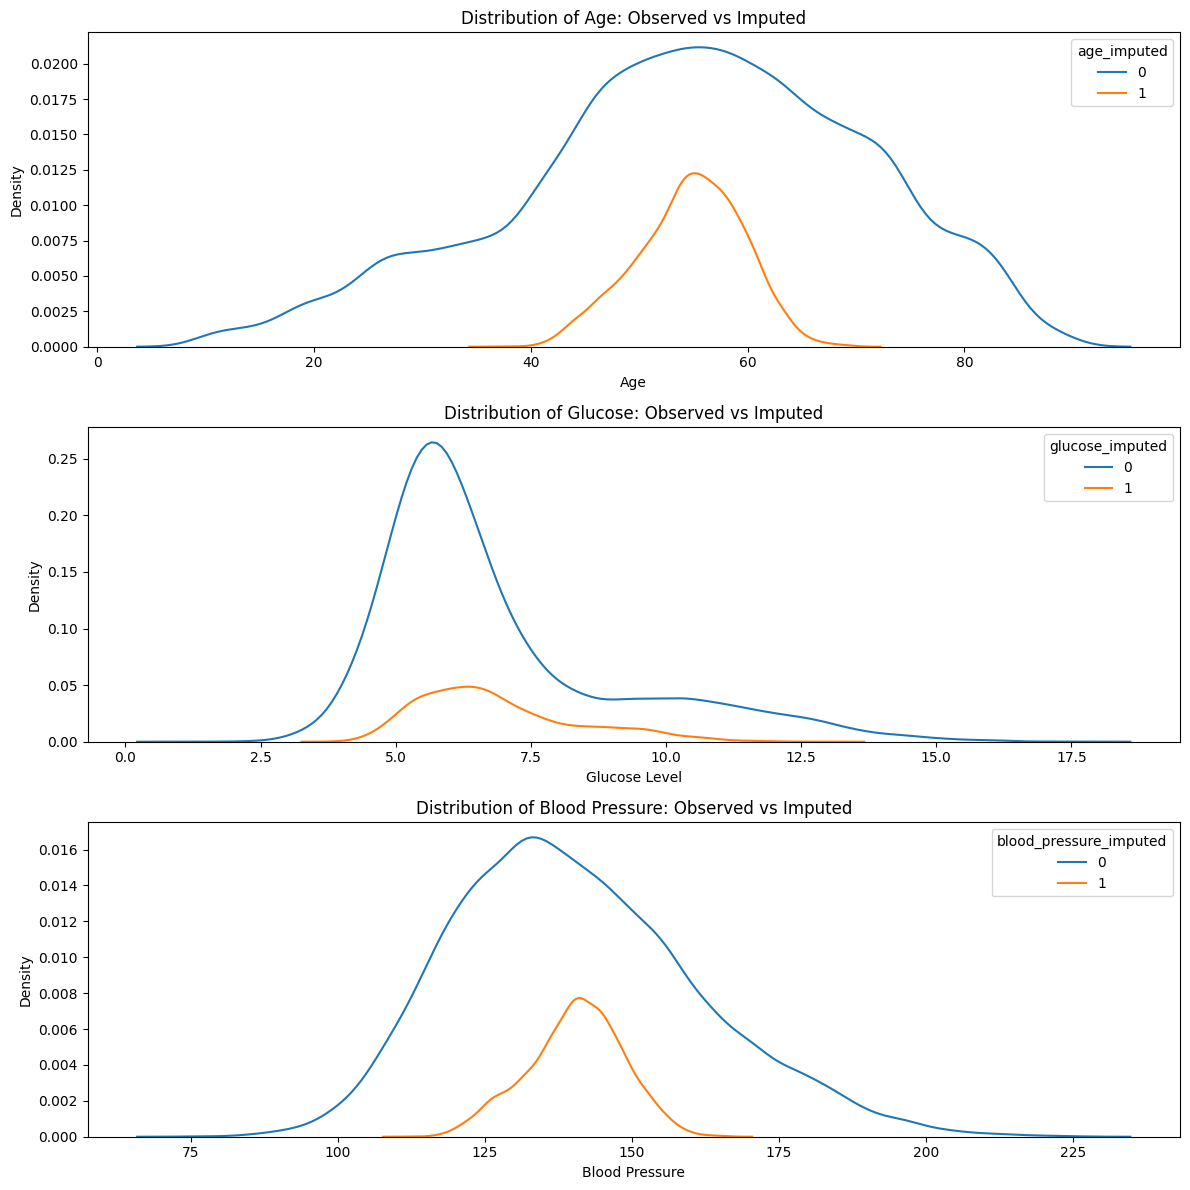

In [ ]:
# Helps confirm that the regression imputation produced realistic estimates

# Plot distributions for each variable side by side (subplots)
plt.figure(figsize=(12, 12))

# Plot for age
plt.subplot(3, 1, 1)
sns.kdeplot(data=df, x='age', hue='age_imputed')
plt.title('Distribution of Age: Observed vs Imputed')
plt.xlabel('Age')
plt.ylabel('Density')

# Plot for glucose
plt.subplot(3, 1, 2)
sns.kdeplot(data=df, x='glucose', hue='glucose_imputed')
plt.title('Distribution of Glucose: Observed vs Imputed')
plt.xlabel('Glucose Level')
plt.ylabel('Density')

# Plot for blood pressure
plt.subplot(3, 1, 3)
sns.kdeplot(data=df, x='blood_pressure', hue='blood_pressure_imputed')
plt.title('Distribution of Blood Pressure: Observed vs Imputed')
plt.xlabel('Blood Pressure')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

**Overall Pattern**
* The observed values (blue) show natural variability and wider distribution ranges
* The imputed values (orange) are narrower and more concentrated, which is expected under standard regression imputation
* The imputed values lie within the plausible range of the real data, suggesting the regression model is producing realistic predictions

**Age Plot**
* The imputed ages cluster around a central region (~50–60), which aligns with the densest part of the observed age distribution
* The imputed values do not produce extreme outliers, staying within the realistic human age range
* This indicates the model used meaningful predictors (BMI, cholesterol, stress level, etc.) to estimate reasonable ages

**Glucose Plot**
* Observed glucose has a skewed distribution with a clear peak around ~5–7 mmol/L
* The imputed glucose values fall within this physiological range and follow a similar shape, though with lower variance
* This shows that the predictors capture meaningful biological relationships with glucose levels

**Blood Pressure Plot**
* Observed blood pressure ranges widely (roughly 100–200 mmHg)
* Imputed values cluster between ~120–150 mmHg — a sensible physiological range
* Imputed values align with the central mass of the observed data, indicating the regression model has captured typical blood pressure patterns

**Why This Shows the Imputation Was Successful**
* Imputed values fall within realistic, medically plausible ranges
* The imputed distributions match the general shape (location and scale) of the observed data
* No unnatural spikes, gaps, or extreme values appear in the imputed data
* The smaller variance is expected because regression imputation predicts values on a regression line, reducing randomness in the data
* The results indicate that the predictors contain real information about these variables, meaning the imputation is grounded in meaningful relationships

## Research Plan

**Research Question**
How do demographic, lifestyle, and medical risk factors individually and jointly influence the likelihood of developing major health conditions within a synthetic dataset, and how can these relationships be used to prototype predictive tools for clinicians? 

**Hypotheses**
Prior research states that demographic (Tucker-Seeley et al., 2011; Schäfer et al., 2012; Mnatzaganian et al., 2024), lifestyle (Ng et al., 2020), and medical (Jani et al., 2019) risk factors impact the likelihood of developing major health conditions. Based on this literature, we pose the following hypotheses. Note “major health conditions” refers to hypertension, type 2 diabetes, obesity, asthma, arthritis, and cancer, unless stated otherwise.
* H1: There is a positive correlation between age, and the development of health conditions. 
* H2: All lifestyle variables impact a patient’s likelihood of developing health conditions.
* H3: All medical variables impact a patient’s likelihood of developing health conditions. 
* H4: All healthy lifestyle choices (i.e. not smoking, not drinking alcohol, more physical activity, higher diet score, higher sleep hours) increasing the likelihood of medical variables being within the healthy ranges suggested by the NHS.
* H5: Certain lifestyle variables influence the severity of medical risk factors on chosen diseases.  

**Analyses Plan**
| No. | Analysis step | Description |
|-----|---------------|-------------|
| 1 | Describe the dataset | Summarise demographics, lifestyle factors, medical markers, and disease prevalence using means, standard deviations, and confidence intervals. Create scatter plot visualisations, interpret the plots, and analyse their suitability for logistic regression. |
| 2 | Test H1. Examine how disease risk changes with age | Use simple logistic regression models with age as the predictor and each medical condition as the outcome. Use a multinomial logistic regression model to see how age influences the probability of having all medical conditions. |
| 3 | Test H2. Identify which lifestyle risk factors predict each disease | Fit linear regressions that include lifestyle risk factors to build richer models. Diseases act as the dependent variable; lifestyle factors as predictors. Use scatter plots for further analysis. |
| 4 | Test H3. Identify which medical risk factors predict each disease | Fit linear regressions that examine how medical markers influence diseases. Diseases act as the dependent variable; medical risk factors as predictors. Use scatter plots for further analysis. |
| 5 | Test H4. Analyse how lifestyle factors influence medical risk markers | Use scatter plots, box plots, and linear/logistic regressions to analyse how lifestyle behaviours relate to medical variables (BMI, blood pressure, cholesterol, glucose, etc.). Lifestyle behaviours are predictors; medical risk markers are dependent variables. |
| 6 | Test H5. Analyse how lifestyle factors influence high-correlation medical risk × disease pairs | Use multiple regression models to identify how the relationship between medical variables and disease outcomes is influenced by lifestyle factors. Only analyse the strongest medical × disease correlations. |
| 7 | Compare predictive power of lifestyle-only models and medical-inclusive models | Assess how adding medical test results changes coefficient sizes, predicted probabilities, and overall model performance. Integrate findings to evaluate whether the dataset supports a plausible chain of relationships. |
| 8 | Build a simple classifier that can diagnose certain conditions | Use nearest neighbour classification to diagnose medical conditions that have plausible causal relationships with input variables (e.g., diabetes from glucose level). |
| 9 | Build Shiny app for clinicians | Use medical-inclusive models to allow clinicians to enter demographic, lifestyle, and medical test results for more precise risk estimates. Include a classification tool where medical conditions can be predicted based on user inputs. |
| 10 | Discuss limitations and validity (Ania) | Address synthetic data limitations, cross-sectional design issues, model assumptions, and the educational (non-clinical) nature of the tool. |

**Outliers**

While keeping in mind that sometimes (especially in health research) outliers are not errors, but they could represent valid cases we will use Z-score to define outliers in our chosen dataset. Z-score will tell us how many standard deviations a data point is from the mean with 3 being the common threshold (a value with a Z-score greater than 3 or less than -3 could be considered an outlier). We will use current literature to distinguish between valid extremes and the noise in our data. We will also use boxplots and scatterplots to visualise chosen variables and the potential outlier.

If the outlier will seem to be due to data or collection errors, they will be removed or corrected depending on the variable. We can replace the outliers using the nearest non-extreme, mean, or median. We can also set thresholds based on the available medical knowledge to cap the data points beyond the set limit (e.g. max BMI = 70 or age = 116).

If the outliers cannot be transformed or removed, we will discuss their presence in our report - the potential reasons for their existence (like medical conditions) and impact on the predictive model we are building.

**References**
* Schäfer, I., Hansen, H., Schön, G. et al. (2012). 'The influence of age, gender and socio-economic status on multimorbidity patterns in primary care: first results from the multicare cohort study'. BMC Health Serv Res, Volume 12, Article 89. https://doi.org/10.1186/1472-6963-12-89
* Jani, B.D., Hanlon, P., Nicholl, B.I. et al. (2019). 'Relationship between multimorbidity, demographic factors and mortality: findings from the UK Biobank cohort'. BMC Med, Volume 17, Article 74. https://doi.org/10.1186/s12916-019-1305-x
* Tucker-Seeley, R., Sorensen, Y., and Subramanian, S. (May 2011). 'Lifecourse socioeconomic circumstances and multimorbidity among older adults'. BMC Public Health, Volume 14, Article 11, p.313. https://doi.org/10.1186/1471-2458-11-313
* Ng, R., Sutradhar, R., Yao, Z., et al. (February 2020). 'Smoking, drinking, diet and physical activity-modifiable lifestyle risk factors and their associations with age to first chronic disease'. Int J Epidemiol, Volume 49, p.113-130. https://doi.org/10.1093/ije/dyz078
* Mnatzaganian, G., Lee, C., Cowen, G. et al. (2024). 'Sex disparities in the prevalence, incidence, and management of diabetes mellitus: an Australian retrospective primary healthcare study involving 668,891 individuals'. BMC Med, Volume 22, Article 475. https://doi.org/10.1186/s12916-024-03698-0

# H1: Examine how disease risk changes with age 

# H2: Identify which lifestyle risk factors predict each disease

# H3: Identify which medical risk factors predict each disease

### Introduction

Hypothesis 3: All medical variables impact a patient’s likelihood of developing health conditions.

In this section of our report we are going to test all of the recorded medical variables to test the probablity of them influencing the development of conditions tested for in the dataset.

To do so we will run a range of statistical test to evaluate the relationship between the medical markers and below specified conditions.

**Conditions' codes legend:**

> Arthritis       0
>
> Asthma          1
>
> Cancer          2
>
> Diabetes        3
>
> Healthy         4
>
> Hypertension    5
>
> Obesity         6

We chose to skip the 8th condition - unknown (code 7) - in our further analysis due to its' ambiguity and robustness of our data.

### Means

To being with we are going to calculate the mean value of each medical marker for each condition to look for significant differences.

In [ ]:
##df['condition_label'] = disease
medical = ['bmi', 'glucose', 'blood_pressure', 'cholesterol', 'triglycerides', 'hba1c', 'oxygen_saturation']

#grouping the DataFrame by the disease column
grouped = df.groupby(['condition_label'])[medical]
#calculating the mean of each medical variable for each disease
mean_med_by_dis = grouped.mean()
print(mean_med_by_dis)

                       bmi   glucose  blood_pressure  cholesterol  \
condition_label                                                     
0                26.918090  5.663355      135.831810     5.423673   
1                25.044585  5.611389      126.791199     5.196897   
2                26.025729  6.226356      132.114560     5.565653   
3                29.092294  9.822320      140.100040     5.424272   
4                23.892823  5.248877      121.192830     4.633406   
5                28.055371  6.139332      158.001699     5.959896   
6                35.152891  5.954227      135.835103     5.705473   
7                28.483049  6.864938      140.429279     5.504019   

                 triglycerides      hba1c  oxygen_saturation  
condition_label                                               
0                     1.914522  38.595827          96.061158  
1                     1.813339  36.725443          90.010481  
2                     1.930389  41.409581          92.978

Interpretation:

Arthritis (0): displays no significant mean differences from other diseases.

Asthma (1): has the lowest oxygen saturation mean.

Cancer (2): has raised cholesterol mean as well as lighly higher triglycerides and HbA1c means than other conditions.

Diabetes (3): displays the highest glucose and HbA1c, with a raised BMI, blood pressure, and triglycerides means.

Healthy (4): has the lowest BMI, glucose, blood pressure, cholesterol, HbA1c, and triglycerides mean levels.

Hypertension (5): displays the highest blood pressure mean as well as higher triglycerides. 

Obesity (6): has the highest mean BMI and triglycerides.

Oxygen saturation displays only small variations (between 95 to 96%) indicating potential lack of clinical relevance.

The above analysis suggest little relationship between the tested medical variables and arthritis and asthma. It also shows that oxygen saturation marker does not play a significant role in diagnosing the chosen conditions.

### Correlations

Secondly we are going to test for the correlation coefficients of each medical variable corresponding to each condition to help us identify patterns and predict trends.

In [ ]:
#creating  dictionary to store the results
corr_by_cond = {}

#looping through each disease
for condition in range(7):
    #filtering the data for the disease condition
    condition_data = (df['condition_label'] == condition).astype(int)

    #calculating correlations for each medical variable with the "condition label" 
    condition_corr = {}
    for var in medical:
        condition_corr[var] = df[var].corr(condition_data)

    #storing the results in the previously created dictionary
    corr_by_cond[condition] = condition_corr

#converting the results back to a DataFrame for better readability
correlation_df = pd.DataFrame(corr_by_cond).T #swapping rows and columns to make condition rows
correlation_df


,bmi,glucose,blood_pressure,cholesterol,triglycerides,hba1c,oxygen_saturation
0,-0.068632,-0.137341,-0.059157,-0.025051,-0.037575,-0.117095,0.074713
1,-0.161674,-0.153267,-0.187220,-0.097397,-0.089742,-0.160227,-0.357194
2,-0.088594,-0.059743,-0.087663,0.013360,-0.024877,-0.055719,-0.109543
3,0.056103,0.701817,-0.009188,-0.051424,0.025602,0.678098,0.001797
4,-0.268610,-0.245952,-0.328364,-0.339382,-0.324077,-0.279771,0.180064
5,-0.040975,-0.182966,0.497449,0.289670,0.141543,-0.206600,0.004672
6,0.447666,-0.158286,-0.089980,0.086726,0.193518,-0.083788,0.107255


In [ ]:
#renaming the index back to disease names for increased readability
#mapping the conditions labels dictionary
disease_map = {
    0: "Arthritis",
    1: "Asthma",
    2: "Cancer",
    3: "Diabetes",
    4: "Healthy",
    5: "Hypertension",
    6: "Obesity"
}

#renaming the index
correlation_df = correlation_df.rename(index = disease_map)
correlation_df

,bmi,glucose,blood_pressure,cholesterol,triglycerides,hba1c,oxygen_saturation
Arthritis,-0.068632,-0.137341,-0.059157,-0.025051,-0.037575,-0.117095,0.074713
Asthma,-0.161674,-0.153267,-0.187220,-0.097397,-0.089742,-0.160227,-0.357194
Cancer,-0.088594,-0.059743,-0.087663,0.013360,-0.024877,-0.055719,-0.109543
Diabetes,0.056103,0.701817,-0.009188,-0.051424,0.025602,0.678098,0.001797
Healthy,-0.268610,-0.245952,-0.328364,-0.339382,-0.324077,-0.279771,0.180064
Hypertension,-0.040975,-0.182966,0.497449,0.289670,0.141543,-0.206600,0.004672
Obesity,0.447666,-0.158286,-0.089980,0.086726,0.193518,-0.083788,0.107255


Each variable represents the Pearson correlation between a medical variable and having vs not having the condition - the closer to 1 this number is the more likely the patient is to have this disease.

**Arthritis**: has no strong distinguishing biomarkers - patients diagnosed with arthritis seems to have slightly lower glucose and Haemoglobin A1c but the effects are very weak.

**Asthma**: lower oxygen saturation is notably associated with asthma diagnosis; other metaboloc markers are mildly negatively associated (-0.10 to -0.19).

**Cancer**: all medical variables correlation are near 0 meaning there are no strong distinguishing medical factors for this condition.

**Diabetes**: very strong association with glucose (0.7) and Haemoglobin A1c (0.68), meaning they are highly likely to be diabetes-related.

**Healthy**: healthy patients are consistently associated with low metabolic (BMI = -0.27, cholesterol = -0.34, triglycerides = -0.32) and cardiovascular (blood pressure = -0.33) markers. Low Haemoglobin A1c (= -0.18) and slightly higher oxygen saturation (= 0.18) are also associated with healthy individuals.

**Hypertension**: has a high association with blood pressure (= 0.5) and a moderate correlation with the cholesterol marker (= 0.29).

**Obesity**: higher BMI is strongly associated with obese patients (= 0.45) and mild associations with triglycerides (= 0.19).

It is worth noting that a negative correlation does not signify that regulating specific biomarker is protective for chosen condition, it simply means it is less common. The weak correlations (<0.2) can be considered not clinically meaningful depending on patient's history (Kraemer et al., 2003).

To conclude the correlation analysis confirms our previous findings of arthritis being significantly influenced by the chosen medical markers. Additionaly we have also found that the medical variables to not correlate strongly with asthma and cancer diagnoses.

### Logistic regression 

We are now going to run logistic regression for each of the diagnoses to determine the likelihood of each medical variable predicting the probability of said diagnosis with each condition. 

In the below analysis each coefficient represents a change in log-odds of having the chosen condition for a 1 unit increase in each medical variable while keeping all other variables constant.

In [ ]:
from sklearn.linear_model import LogisticRegression

#setting the medical variables as disease predictors
X = df[medical]
#setting the binary target variable as arthritis and converting it to integers
y = (df['condition_label'] == 0). astype(int)

#creating the logistic regression model
model = LogisticRegression(max_iter = 1000) #fixing the different scales
#fitting the model on the previously exmplained x and y 
model.fit(X, y)

#outputting the coefficients of the logistic regression model
pd.Series(model.coef_[0], index = medical)

bmi                 -0.036990
glucose             -0.361358
blood_pressure      -0.007956
cholesterol          0.061927
triglycerides        0.015229
hba1c               -0.017059
oxygen_saturation    0.086388
dtype: float64

**Arthritis**

As in the previous analyses arthritis shows to have no significant predictors. 

As in the correlations analysis result patients with slightly higher glucose levels  seem to have a higher possibility of having arthritis which most possibly hints at the present of confounding bias. 

In [ ]:
#setting the medical variables as disease predictors
X = df[medical]
#setting the binary target variable as asthma and converting it to integers
y = (df['condition_label'] == 1). astype(int)

#creating the logistic regression model
model = LogisticRegression(max_iter = 1000) #fixing the different scales
#fitting the model on the previously exmplained x and y 
model.fit(X, y)

#outputting the coefficients of the logistic regression model
pd.Series(model.coef_[0], index = medical)

bmi                 -0.084275
glucose             -0.332853
blood_pressure      -0.034944
cholesterol         -0.195713
triglycerides       -0.165918
hba1c               -0.038926
oxygen_saturation   -0.302592
dtype: float64

**Asthma**

It seems that high glucose lowers the risk (-0.33) of being diagnosed with asthma. Considering this finding to be inconsistent with above analyses points toward another confunding bias in our dataset.

The second highest predictor for asthma is oxygen level which confirms previous findings. The above correlation shows that high oxygen level lower the risk of being diagnosed in asthma (-0.3).

In [ ]:
#setting the medical variables as disease predictors
X = df[medical]
#setting the binary target variable as cancer and converting it to integers
y = (df['condition_label'] == 2). astype(int)

#creating the logistic regression model
model = LogisticRegression(max_iter = 1000) #fixing the different scales
#fitting the model on the previously exmplained x and y 
model.fit(X, y)

#outputting the coefficients of the logistic regression model
pd.Series(model.coef_[0], index = medical)

bmi                 -0.073225
glucose             -0.103717
blood_pressure      -0.023796
cholesterol          0.327833
triglycerides        0.030570
hba1c               -0.006097
oxygen_saturation   -0.098046
dtype: float64

**Cancer**

Like previously found most of the medical variables have very low correlation to cancer. 

Like in the mean analysis high cholesterol seems to increase the likelihood of cancer diagnosis (0.32) hinting only a weak correlation.

In [ ]:
#setting the medical variables as disease predictors
X = df[medical]
#setting the binary target variable as diabetes and converting it to integers
y = (df['condition_label'] == 3). astype(int)

#creating the logistic regression model
model = LogisticRegression(max_iter = 1000) #fixing the different scales
#fitting the model on the previously exmplained x and y 
model.fit(X, y)

#outputting the coefficients of the logistic regression model
pd.Series(model.coef_[0], index = medical)

bmi                 -0.000175
glucose              0.664346
blood_pressure      -0.006122
cholesterol         -0.193948
triglycerides       -0.065003
hba1c                0.098998
oxygen_saturation    0.003980
dtype: float64

**Diabetes**

Glucose is the strongers predictor (0.66) meaning the higher patients glucose the higher odds of being diagnosed as diabetic. That proves to be consistent with the above correlation results. 

HbA1c has a moderate positive correlation (=0.098 suggesting ~ 10% higher odds per standard deviation) which adds predictive value beyond glucose.

With cholesterol coefficient equaling -0.19 suggest that high cholesterol lowers the odds of diabetes diagnosis which could likely reflect it being confounding variable not cholesterol being protective.

In [ ]:
#setting the medical variables as disease predictors
X = df[medical]
#setting the binary target variable as healthy and converting it to integers
y = (df['condition_label'] == 4). astype(int)

#creating the logistic regression model
model = LogisticRegression(max_iter = 1000) #fixing the different scales
#fitting the model on the previously exmplained x and y 
model.fit(X, y)

#outputting the coefficients of the logistic regression model
pd.Series(model.coef_[0], index = medical)

bmi                 -0.135369
glucose             -0.605357
blood_pressure      -0.061618
cholesterol         -1.488670
triglycerides       -2.629669
hba1c               -0.126249
oxygen_saturation    0.234573
dtype: float64

**Healthy**

Healthy patients have consistently shown to have a strong correlation with low triglycerides (-2.6), cholesterol (-1.5), and glucose (-0.6).

The above correlation shows weak correlation between low BMI (-0.14) and Haemoglobin A1c (-0.13) and being considered a healthy patient. 

High oxygen saturation weakly increases the likelihood of being diagnosed as healthy (0.24) confirming our previous findings.

In [ ]:
#setting the medical variables as disease predictors
X = df[medical]
#setting the binary target variable as hypertension and converting it to integers
y = (df['condition_label'] == 5). astype(int)

#creating the logistic regression model
model = LogisticRegression(max_iter = 1000) #fixing the different scales
#fitting the model on the previously exmplained x and y 
model.fit(X, y)

#outputting the coefficients of the logistic regression model
pd.Series(model.coef_[0], index = medical)

bmi                 -0.046702
glucose             -0.214224
blood_pressure       0.072756
cholesterol          0.630067
triglycerides        0.330058
hba1c               -0.043321
oxygen_saturation    0.007193
dtype: float64

**Hypertension**

Suprisingly it is cholesterol levels that show to be the strongest predictor for hypertension (0.63) followed by triglycerides (0.33).

Blood pressure has shown to influence the diagnosis very weakly (0.07) which contradicts our previous findings.

Similarily glucose seems to have a weak negative correlation to hypertension (-0.2) meaning higher glucose levels decrease the likelyhood of developing hypertension.

In [ ]:
#setting the medical variables as disease predictors
X = df[medical]
#setting the binary target variable as obesity and converting it to integers
y = (df['condition_label'] == 6). astype(int)

#creating the logistic regression model
model = LogisticRegression(max_iter = 1000) #fixing the different scales
#fitting the model on the previously exmplained x and y 
model.fit(X, y)

#outputting the coefficients of the logistic regression model
pd.Series(model.coef_[0], index = medical)

bmi                  0.272043
glucose             -0.417459
blood_pressure      -0.029407
cholesterol          0.269820
triglycerides        0.907254
hba1c               -0.010534
oxygen_saturation    0.093195
dtype: float64

**Obesity**

The higest predictor for obesity are triglycerides levels (0.91), followed by BMI (0.27), and cholesterol (0.27) with weak influence. Which loosely follows the trends found previously.

High glucose is also has moderate negative correlation to obesity (-0.42) which has not been shown in the above analyses.

**Summary**

The correlation analysis confirms our previous findings of arthritis, asthma, and cancer seem to be very weakly explained by the medical markers tested in the dataset. 

Healthy patients consistently showcase low metabolic and cardiovascular markers.

Hypertension seems to be predictable based on cholesterol, triglycerides and weakly by blood pressure which contradicts the markers significance found previously.

Similarily obesity diagnosis' likelihood increases with BMI, triglycerides, amd cholesterol levels only vaguely fitting the previous analyses findings.

### Multinomial logistic regression model

Lastly, we are using multinomial logistic regression to predict the condtions from the provided medical markers. 

Each coefficient will represent the effect of a 1 standard deviation increase in that predictor.

For each disease row the positive coefficient signifies that a higher value of that variable increases the probability of that condition. 

A negative coefficient mean that the higher value decreases the probablity. 

And larger absolute value signifies stronger effect.

In [ ]:
from sklearn.preprocessing import StandardScaler

#scaling the predictors to avoid warnings
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#creating a logistic regression model for multiclass classification
model = LogisticRegression(solver = 'lbfgs', max_iter = 1000) #specifying the optimisation algorithm ued to fit the model
model.fit(X_scaled, df['condition_label'])

#creating a dataframe to hold the coefficients for each class in the multinomial logistic regression model
coef_df = pd.DataFrame(
    model.coef_,
    columns = medical,
    index = model.classes_
)

#renaming the index for readability
coef_df.rename(index = disease_map, inplace = True)
coef_df.head(7) #dropping the 7th row that we are now inlcuding in our analysis


,bmi,glucose,blood_pressure,cholesterol,triglycerides,hba1c,oxygen_saturation
Arthritis,-0.139628,-0.630676,0.090465,0.063640,0.079056,-0.156835,0.354668
Asthma,-0.546223,-0.642714,-0.556104,-0.205492,-0.114223,-0.489713,-0.911567
Cancer,-0.409750,0.304115,-0.277648,0.269548,0.084925,0.204948,-0.477771
Diabetes,0.235856,1.740248,0.271563,0.026456,0.183291,1.574126,0.024541
Healthy,-0.752987,-1.344040,-1.087536,-1.133588,-1.294709,-1.740728,0.623890
Hypertension,0.028408,0.119522,1.330670,0.545794,0.338642,-0.123142,0.027214
Obesity,1.440651,-0.275595,-0.084514,0.354488,0.582850,0.231068,0.340805


Interpretation by condition:

**Arthritis**: displays no strong distinguishing medical features.

**Asthma**: strong negative association with oxygen saturation, as well as lower BMI and blood pressure increasing the probability of being diagnosed with asthma (relative to other conditions).

**Cancer**: metabolic markers have moderate influence - cholesetrol, glucose, and HbA1c - not enough for cancer to be predictable from these markers.

Lower oxygen saturation is associated with cancer as well, although only weakly.

**Diabetes**: glucose and HbA1c are the strongest predictors for diabetes confirming our previous findings, while BMI and triglycerides also increase the risk.

**Healthy**: healthy patients display higer oxygen stauration and low metabolic risk (BMI, glucoe, cholesterol, triglucerides, and HbA1c).

That shows that healthy individuals tend to have lower BMI, glucose, blood pressure, triglycerides levels,and HbA1c. Also, higher oxygen saturation increase the probability of being healthy.

**Hypertension**: displays blood pressure as the strongest driver with triglycerides as a secondary contributors to being diagnosed with hypertension but the relationship is weaker than expected.

Glucose level also display a weak relationship separating hypertension from a diabetes diagnosis.

**Obesity**: here again BMI is the dominan predictor with a moderate contribution of lipid markers (triglycerides). Again those findinga agree with the earlier results.


It is important to note that a positive coefficient means that the chosen medical variable is the cause of disease. It simply suggests that given other predictors, the increase in this variable make this disease more likely than the others.

In [ ]:
#splitting the data into train and test sets
#setting predictors
X = df[medical]

#setting target
y = df['condition_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state = 42, test_size = 0.2, stratify = y
)

#scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#training the logistic regression model
model = LogisticRegression(solver = 'lbfgs', max_iter = 1000, multi_class = 'auto')
model.fit(X_train_scaled, y_train)

#making predictions on the test set
y_pred = model.predict(X_test_scaled)

#evaluating using accuracy
print(f"Logistic Regression model accuracy: "
      f"{metrics.accuracy_score(y_test, y_pred) * 100:.2f}%"
      )

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression model accuracy: 62.25%


A 62.25% accuracy is quite strong for a multi-class medical classification. Despite the model not capturing the nonlinear relationships and not modeling interactions between medical variables our coefficients align well with clinical expectations.

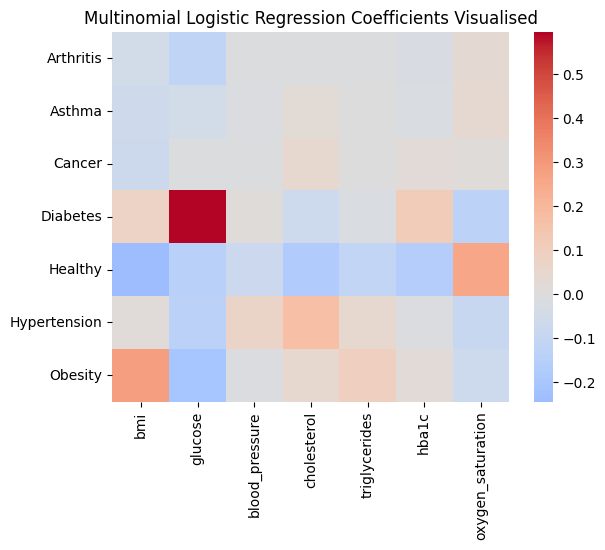

In [ ]:
#plotting a heatmap to visualise the coefficients for each class and feature
sns.heatmap(coef_df.loc[list(disease_map.values())],
            cmap = 'coolwarm', center = 0)
plt.title("Multinomial Logistic Regression Coefficients Visualised")
plt.show()

The multinomial logistic regression model identified clinically meaningful associations beyween standardised metabolic and physiological markers and medical condition markers, with:

- glucose and HbA1c strongly predicting diabetes
- BMI predicting obesity
- blood pressure predicting hypertension
- oxygen saturation differentiating respiratory and healthy states

while achieving an overall classification accuracy of 62.25%.

### Conclusion

Hypothesis 3: All medical variables impact a patient’s likelihood of developing health conditions.

The above findings disprove our initial hypothesis as most of the variables do not predict the likelihood of developing the chosen health condition. 

More importantly we have found that only 4 out of the 7 conditions have strong medical predictors, those being: diabetes, healthy, hypertension and obesity.

# H4: Analyse how lifestyle factors influence medical risk markers 

### Introduction

### Correlations

In [ ]:
#calculating pearson correlations to quantify the strength and direction of the linear relationship between variables
lifestyle = ['smoking_status', 'alcohol_use', 'physical_activity', 'diet_score', 'family_history', 'stress_level', 'sleep_hours']
medical = ['bmi', 'glucose', 'blood_pressure', 'cholesterol', 'triglycerides', 'hba1c', 'oxygen_saturation']

corr = pd.DataFrame(index = lifestyle, columns = medical)

for l in lifestyle:
    for m in medical:
        corr.loc[l, m] = df[l].corr(df[m])

print(corr)

                        bmi   glucose blood_pressure cholesterol  \
smoking_status    -0.002459 -0.045166       0.112814      0.0818   
alcohol_use        0.040261 -0.021389       0.064964    0.064311   
physical_activity -0.346375 -0.247804      -0.147527   -0.208002   
diet_score        -0.296641 -0.323195       -0.20827   -0.220512   
family_history     0.057824  0.160942       0.119529    0.075586   
stress_level      -0.012055  0.071208       0.239069    0.162524   
sleep_hours       -0.022468  -0.12848      -0.160865   -0.135107   

                  triglycerides     hba1c oxygen_saturation  
smoking_status         0.059926 -0.045991         -0.045577  
alcohol_use            0.047892 -0.018405          0.011794  
physical_activity     -0.258722 -0.284669         -0.016846  
diet_score            -0.254156  -0.34553          0.025911  
family_history         0.065852   0.15082         -0.000745  
stress_level           0.101146  0.056337         -0.105826  
sleep_hours          

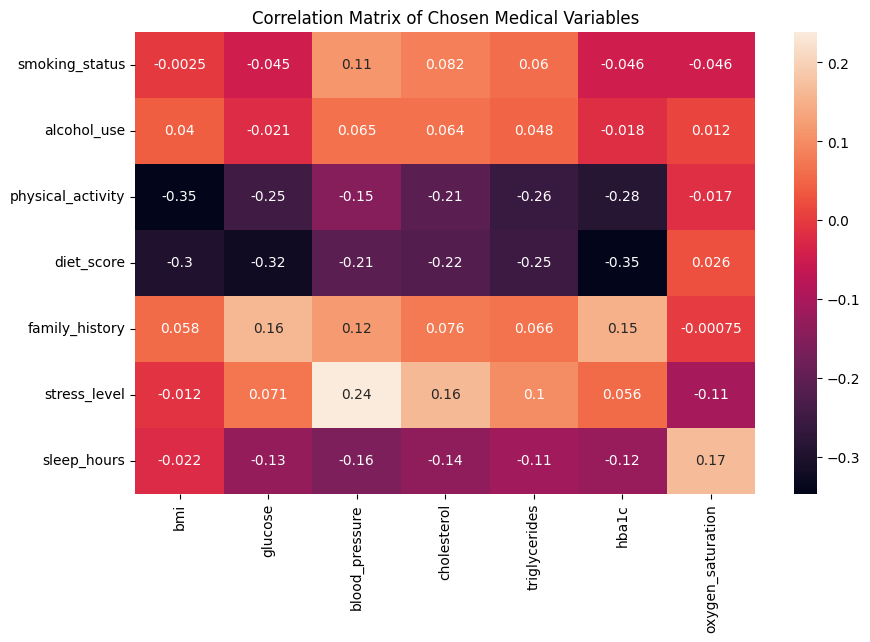

In [ ]:
#visualising the correlations
plt.figure(figsize = (10, 6))
corr = corr.astype(float) #converting the correlation matrix to float dtype
sns.heatmap(corr, annot = True)
plt.title("Correlation Matrix of Chosen Medical Variables")
plt.show()

From the previous data description we know that the 'smoking', 'alcohol_use', and 'medical_history' variables are binary - hence their relationship to the medical outcomes will be plotted using a boxplot over scatterplot.

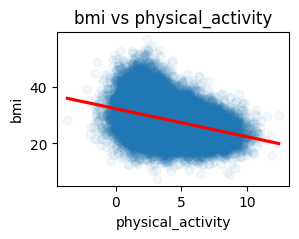

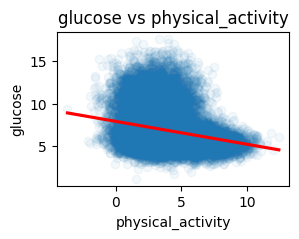

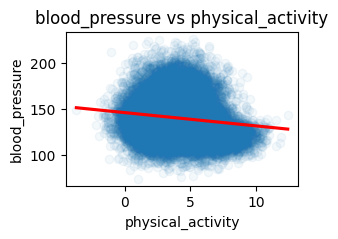

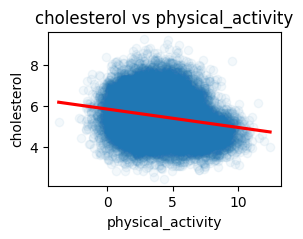

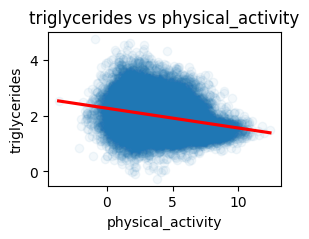

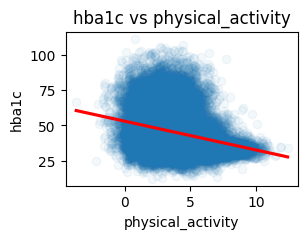

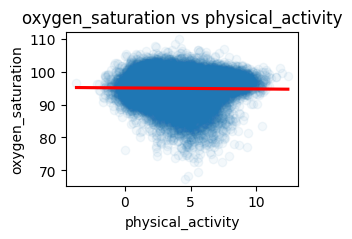

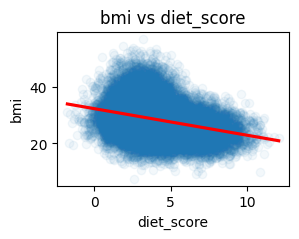

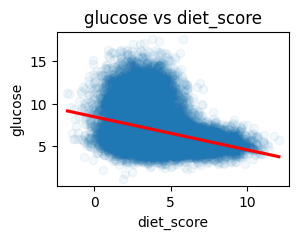

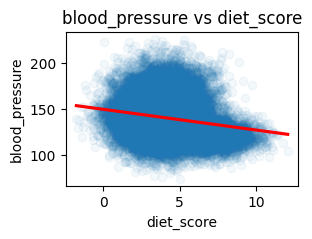

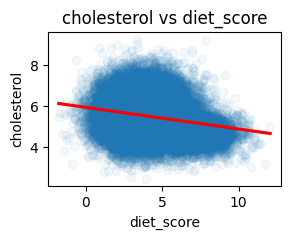

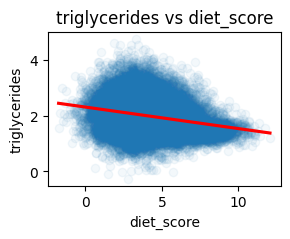

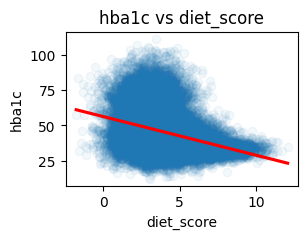

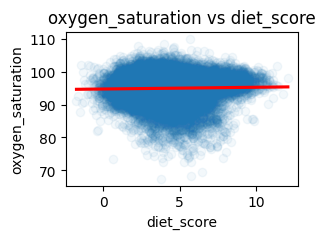

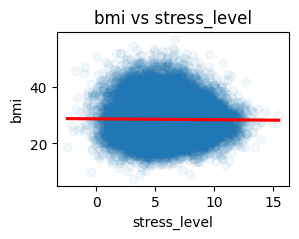

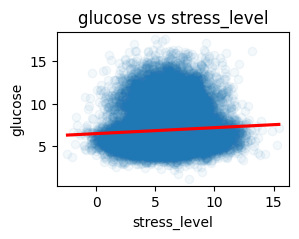

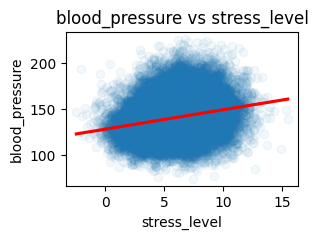

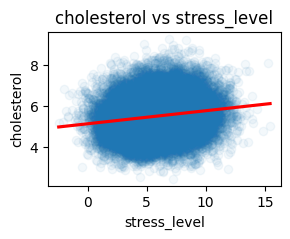

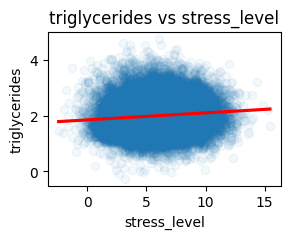

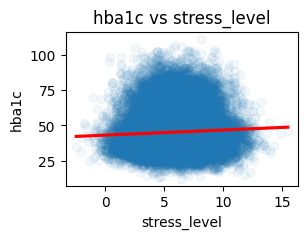

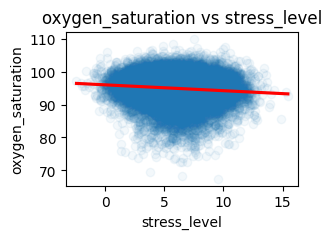

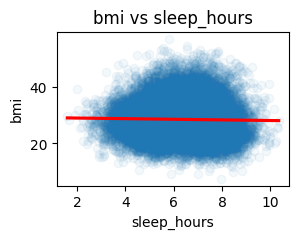

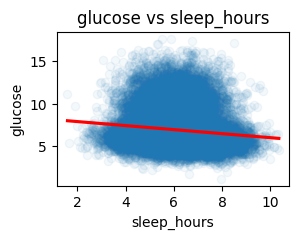

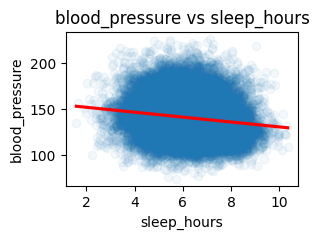

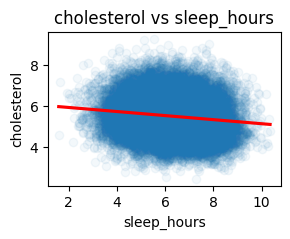

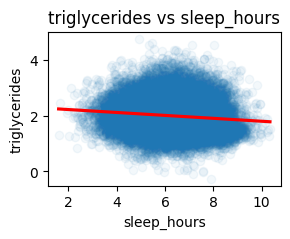

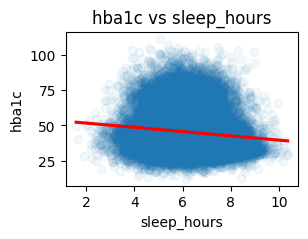

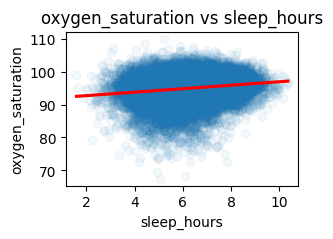

In [ ]:
#list of the previously defined continous lifestyle variables
cont_lifestyle = ['physical_activity', 'diet_score', 'stress_level', 'sleep_hours']

#creating scatterplots for every continous lifestyle and medical variable pair
for lf in cont_lifestyle:
    for mv in medical:
        plt.figure(figsize=(3, 2))
        sns.regplot(x = df[lf], y = df[mv], scatter_kws = {'alpha': 0.05}, line_kws = {'color': 'red'}) #adjusting alpha for points transparency
        plt.title(f"{mv} vs {lf}") #setting the title of a plot as an f-string to automatically insert the variable names into the title
        plt.xlabel(lf)
        plt.ylabel(mv)
        plt.show()


In [ ]:
#linear regression for the continous variables
formula_activity = 'physical_activity ~ bmi + glucose + blood_pressure + cholesterol + triglycerides + hba1c + oxygen_saturation'
model_activity = ols(formula_activity, data = df).fit()
print(model_activity.summary())

                            OLS Regression Results                            
Dep. Variable:      physical_activity   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     1349.
Date:                Thu, 11 Dec 2025   Prob (F-statistic):               0.00
Time:                        11:37:33   Log-Likelihood:                -59432.
No. Observations:               30000   AIC:                         1.189e+05
Df Residuals:                   29992   BIC:                         1.189e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            11.8537      0.27

In [ ]:
formula_diet = 'diet_score ~ bmi + glucose + blood_pressure + cholesterol + triglycerides + hba1c + oxygen_saturation'
model_diet = ols(formula_diet, data = df).fit()
print(model_diet.summary())

                            OLS Regression Results                            
Dep. Variable:             diet_score   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     1588.
Date:                Thu, 11 Dec 2025   Prob (F-statistic):               0.00
Time:                        11:37:33   Log-Likelihood:                -55757.
No. Observations:               30000   AIC:                         1.115e+05
Df Residuals:                   29992   BIC:                         1.116e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.2204      0.24

In [ ]:
formula_stress = 'stress_level ~ bmi + glucose + blood_pressure + cholesterol + triglycerides + hba1c + oxygen_saturation'
model_stress = ols(formula_stress, data = df).fit()
print(model_stress.summary())

                            OLS Regression Results                            
Dep. Variable:           stress_level   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     398.7
Date:                Thu, 11 Dec 2025   Prob (F-statistic):               0.00
Time:                        11:37:33   Log-Likelihood:                -65226.
No. Observations:               30000   AIC:                         1.305e+05
Df Residuals:                   29992   BIC:                         1.305e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.7317      0.33

In [ ]:
formula_sleep = 'sleep_hours ~ bmi + glucose + blood_pressure + cholesterol + triglycerides + hba1c + oxygen_saturation'
model_sleep = ols(formula_sleep, data = df).fit()
print(model_sleep.summary())

                            OLS Regression Results                            
Dep. Variable:            sleep_hours   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     387.1
Date:                Thu, 11 Dec 2025   Prob (F-statistic):               0.00
Time:                        11:37:33   Log-Likelihood:                -46430.
No. Observations:               30000   AIC:                         9.288e+04
Df Residuals:                   29992   BIC:                         9.294e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.6313      0.17

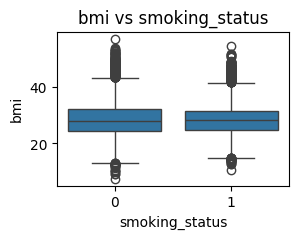

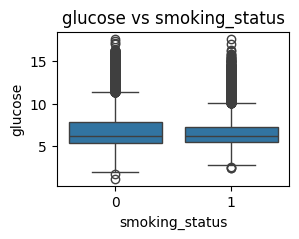

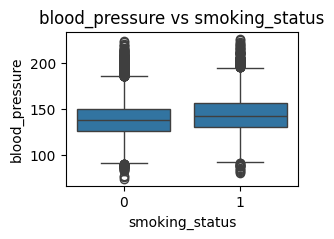

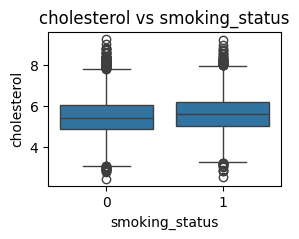

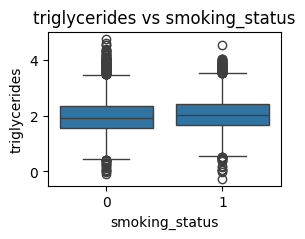

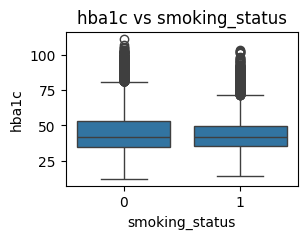

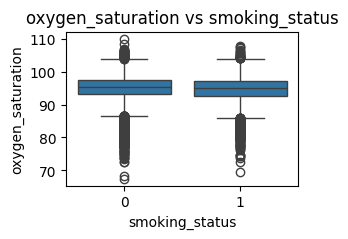

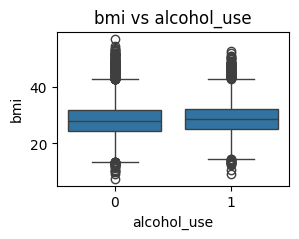

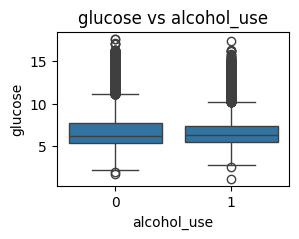

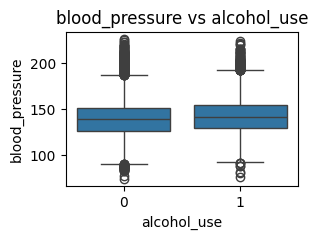

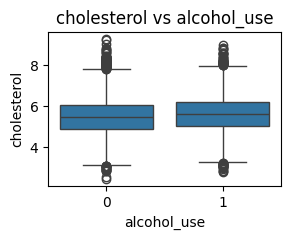

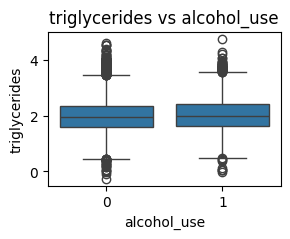

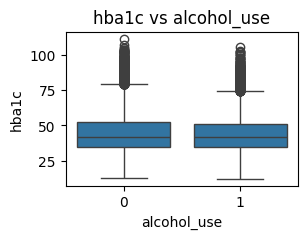

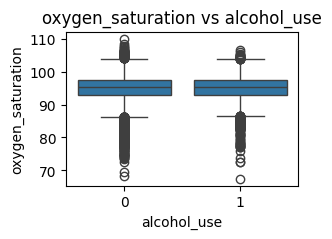

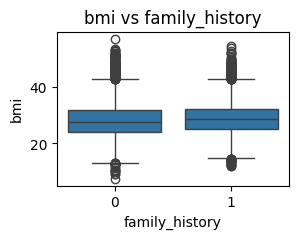

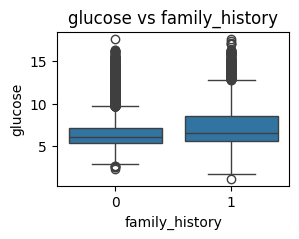

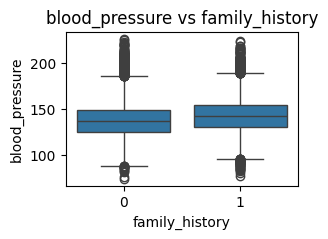

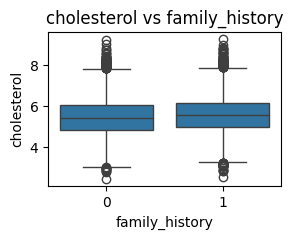

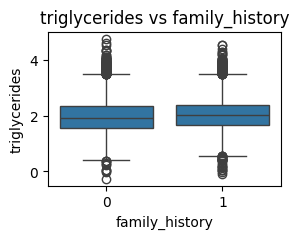

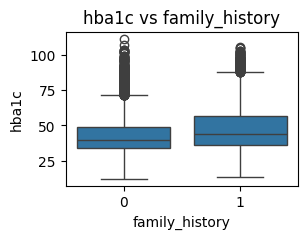

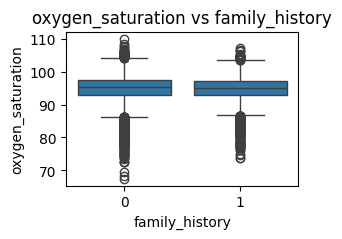

In [ ]:
#creating boxplots for each binary lifestyle factor and medical variables
for lf in ['smoking_status', 'alcohol_use', 'family_history']:
    for mv in medical:
        plt.figure(figsize=(3, 2))
        sns.boxplot(x=df[lf], y=df[mv])
        plt.title(f"{mv} vs {lf}") #setting the title of a plot as an f-string to automatically insert the variable names into the title
        plt.xlabel(lf)
        plt.ylabel(mv)
        plt.show()


In [ ]:
#logistic regression for binary variables
formula_smoking = 'smoking_status ~ bmi + glucose + blood_pressure + cholesterol + triglycerides + hba1c + oxygen_saturation'
model_smoking = sm.formula.logit(formula_smoking, data=df)
results_smoking = model_smoking.fit()
print(results_smoking.summary())

Optimization terminated successfully.
         Current function value: 0.581659
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         smoking_status   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29992
Method:                           MLE   Df Model:                            7
Date:                Thu, 11 Dec 2025   Pseudo R-squ.:                 0.01868
Time:                        11:37:38   Log-Likelihood:                -17450.
converged:                       True   LL-Null:                       -17782.
Covariance Type:            nonrobust   LLR p-value:                3.199e-139
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.3217      0.347     -0.928      0.354      -1.001       0.358
bmi     

In [ ]:
formula_alcohol = 'alcohol_use ~ bmi + glucose + blood_pressure + cholesterol + triglycerides + hba1c + oxygen_saturation'
model_alcohol = sm.formula.logit(formula_alcohol, data=df)
results_alcohol = model_alcohol.fit()
print(results_alcohol.summary())

Optimization terminated successfully.
         Current function value: 0.544841
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            alcohol_use   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29992
Method:                           MLE   Df Model:                            7
Date:                Thu, 11 Dec 2025   Pseudo R-squ.:                0.008268
Time:                        11:37:38   Log-Likelihood:                -16345.
converged:                       True   LL-Null:                       -16482.
Covariance Type:            nonrobust   LLR p-value:                 4.389e-55
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.5488      0.376     -9.448      0.000      -4.285      -2.813
bmi     

In [ ]:
#logistic regression for binary variables
formula_history = 'family_history ~ bmi + glucose + blood_pressure + cholesterol + triglycerides + hba1c + oxygen_saturation'
model_history = sm.formula.logit(formula_history, data=df)
results_history = model_history.fit()
print(results_history.summary())

Optimization terminated successfully.
         Current function value: 0.663025
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         family_history   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29992
Method:                           MLE   Df Model:                            7
Date:                Thu, 11 Dec 2025   Pseudo R-squ.:                 0.03320
Time:                        11:37:39   Log-Likelihood:                -19891.
converged:                       True   LL-Null:                       -20574.
Covariance Type:            nonrobust   LLR p-value:                8.468e-291
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.6757      0.326    -11.279      0.000      -4.314      -3.037
bmi     

Multivariate models with multiple lifestyle factors included as predictors to see how they jointly affect medical risk markers?

# H5: Analyse how lifestyle factors influence high-correlation medical risk × disease pairs

# Compare predictive power of lifestyle-only models and medical-inclusive models

# Build a simple classifier that can diagnose certain conditions

## References

Chumta Kreamer, H., Morgan, G.A., Leech, N.L., Gliner, J.A., Vaske, J.J., Harmon, R.J. (2003) _Measures of Clinical Significance._ Clinicians' Guide to Research Methods and Statistics. doi.org/10.1097/01.chi.0000091507.46853.d1